In [1]:
 # importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.impute import KNNImputer

In [32]:
# important functions
# function that will assign wind direction a quadrant of magnetic compass
def wind_dir(x):
    if x >=0 and x < 90:
        return "NE"
    elif x >= 90 and x < 180:
        return "NW"
    elif x>= 180 and x < 270:
        return "SW"
    else:
        return "SE"
# function to change the labelling of weeks
def week_num(x):
    if x == 26:
        return 1
    elif x == 27:
        return 2
    elif x == 28:
        return 3
    else:
        return 4

In [47]:
# reading data
df = pd.read_csv('data_per_hr_basis.csv')
df.head()

,Timestamp,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2023-01-01 00:00:00,148.50,180.75,34.475,34.375,46.400,34.450,7.625,1.725,6.175,...,NaN,9.25,90.300,0.600,139.875,0.0,0.0,8.575,986.625,NaN
1,2023-01-01 01:00:00,134.25,173.00,29.850,22.900,36.525,32.950,7.500,1.525,4.100,...,NaN,8.85,90.225,0.475,120.250,0.0,0.0,8.500,986.500,NaN
2,2023-01-01 02:00:00,132.75,162.75,31.000,25.200,38.700,28.900,7.100,NaN,5.900,...,NaN,8.50,90.300,0.375,140.150,0.0,0.0,8.500,986.350,NaN
3,2023-01-01 03:00:00,130.50,162.50,29.875,23.925,37.075,27.975,9.675,1.375,5.250,...,NaN,8.45,90.575,0.475,144.975,0.0,0.0,8.500,986.200,NaN
4,2023-01-01 04:00:00,113.25,139.00,20.200,23.125,28.750,27.900,5.700,1.175,4.925,...,NaN,8.35,90.800,0.225,82.125,0.0,0.0,8.500,986.250,NaN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            8760 non-null   object 
 1   PM2.5 (µg/m³)        8503 non-null   float64
 2   PM10 (µg/m³)         8476 non-null   float64
 3   NO (µg/m³)           8544 non-null   float64
 4   NO2 (µg/m³)          8544 non-null   float64
 5   NOx (ppb)            8544 non-null   float64
 6   NH3 (µg/m³)          8279 non-null   float64
 7   SO2 (µg/m³)          8500 non-null   float64
 8   CO (mg/m³)           8208 non-null   float64
 9   Ozone (µg/m³)        8481 non-null   float64
 10  Benzene (µg/m³)      8385 non-null   float64
 11  Toluene (µg/m³)      8385 non-null   float64
 12  Xylene (µg/m³)       0 non-null      float64
 13  O Xylene (µg/m³)     0 non-null      float64
 14  Eth-Benzene (µg/m³)  0 non-null      float64
 15  MP-Xylene (µg/m³)    0 non-null      f

In [49]:
# changing the datatype of "Timestamp" from object to datetime.
df['Timestamp'] = pd.to_datetime(df["Timestamp"])
df.columns
df = df.loc[df['Timestamp'].dt.month == 7, ["Timestamp",'PM2.5 (µg/m³)', 'RF (mm)', 'SR (W/mt2)', 'WD (deg)', 'WS (m/s)', 'RH (%)', 'AT (°C)',
'TOT-RF (mm)']]
df

,Timestamp,PM2.5 (µg/m³),RF (mm),SR (W/mt2),WD (deg),WS (m/s),RH (%),AT (°C),TOT-RF (mm)
4344,2023-07-01 00:00:00,20.0,0.0,8.500,131.375,0.575,93.400,29.125,0.0
4345,2023-07-01 01:00:00,17.0,0.0,8.500,83.750,0.675,93.400,29.175,0.0
4346,2023-07-01 02:00:00,20.0,0.0,8.500,48.600,0.650,93.400,29.125,0.0
4347,2023-07-01 03:00:00,18.0,0.0,8.550,206.850,0.525,93.475,29.100,0.0
4348,2023-07-01 04:00:00,14.0,0.0,8.525,136.150,0.400,93.475,28.900,0.0
...,...,...,...,...,...,...,...,...,...
5083,2023-07-31 19:00:00,17.0,0.0,10.775,126.750,0.825,69.550,31.700,0.0
5084,2023-07-31 20:00:00,19.0,0.0,8.475,139.050,0.475,80.950,30.375,0.0
5085,2023-07-31 21:00:00,23.0,0.0,8.500,104.825,0.575,84.150,30.175,0.0
5086,2023-07-31 22:00:00,20.0,0.0,8.500,124.375,0.675,85.625,30.000,0.0


In [62]:
# creating separate columns for week, day, hour, weekday
df['hour'] = df['Timestamp'].dt.hour
df['hour'] = df['hour']+1

df['day'] = df['Timestamp'].dt.day
df['weekday'] = df['Timestamp'].dt.weekday # monday, tuesday etc.

# assigning week number
df['week'] = (df["Timestamp"].dt.isocalendar().week).apply(week_num)

### Check for null values in %

In [64]:
# checking for null values
df.isna().sum()*100/df.shape[0]


Timestamp         0.000000
PM2.5 (µg/m³)    24.193548
RF (mm)          27.553763
SR (W/mt2)       27.688172
WD (deg)         27.822581
WS (m/s)         27.822581
RH (%)           27.553763
AT (°C)          27.553763
TOT-RF (mm)       0.000000
hour              0.000000
day               0.000000
weekday           0.000000
week              0.000000
dtype: float64

In [66]:
# unique values in features
print('Total unique values in feature TOT-RF:',df["TOT-RF (mm)"].nunique())

Total unique values in feature TOT-RF: 11


In [68]:
# dropping redundant column
df.drop('Timestamp', inplace = True,axis = 1)

### Missing value imputation using K nearest neighbor

In [69]:
# KNN imputer
imputer = KNNImputer(n_neighbors = 4, weights ='distance')

In [70]:
df1 = pd.DataFrame(imputer.fit_transform(df),columns = df.columns)
df1.head()

,PM2.5 (µg/m³),RF (mm),SR (W/mt2),WD (deg),WS (m/s),RH (%),AT (°C),TOT-RF (mm),hour,day,weekday,week
0,20.0,0.0,8.500,131.375,0.575,93.400,29.125,0.0,1.0,1.0,5.0,1.0
1,17.0,0.0,8.500,83.750,0.675,93.400,29.175,0.0,2.0,1.0,5.0,1.0
2,20.0,0.0,8.500,48.600,0.650,93.400,29.125,0.0,3.0,1.0,5.0,1.0
3,18.0,0.0,8.550,206.850,0.525,93.475,29.100,0.0,4.0,1.0,5.0,1.0
4,14.0,0.0,8.525,136.150,0.400,93.475,28.900,0.0,5.0,1.0,5.0,1.0


In [71]:
# checking for missing values
df1.isna().sum()

PM2.5 (µg/m³)    0
RF (mm)          0
SR (W/mt2)       0
WD (deg)         0
WS (m/s)         0
RH (%)           0
AT (°C)          0
TOT-RF (mm)      0
hour             0
day              0
weekday          0
week             0
dtype: int64

In [73]:
# creating new feature by assigning quadrant to wind speed
df1['WD2 (deg)'] = df1['WD (deg)'].apply(wind_dir)

In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PM2.5 (µg/m³)  744 non-null    float64
 1   RF (mm)        744 non-null    float64
 2   SR (W/mt2)     744 non-null    float64
 3   WD (deg)       744 non-null    float64
 4   WS (m/s)       744 non-null    float64
 5   RH (%)         744 non-null    float64
 6   AT (°C)        744 non-null    float64
 7   TOT-RF (mm)    744 non-null    float64
 8   hour           744 non-null    float64
 9   day            744 non-null    float64
 10  weekday        744 non-null    float64
 11  week           744 non-null    float64
 12  WD2 (deg)      744 non-null    object 
dtypes: float64(12), object(1)
memory usage: 75.7+ KB


In [76]:
df1.columns

Index(['PM2.5 (µg/m³)', 'RF (mm)', 'SR (W/mt2)', 'WD (deg)', 'WS (m/s)',
       'RH (%)', 'AT (°C)', 'TOT-RF (mm)', 'hour', 'day', 'weekday', 'week',
       'WD2 (deg)'],
      dtype='object')

In [79]:
df1['hour'] = df1['hour'].astype('int')
df1['day'] = df1['day'].astype('int')
df1['week'] = df1['week'].astype('int')
df1['weekday'] = df1['weekday'].astype('int')
df1['RF (mm)'] = df1['RF (mm)'].round(2)
df1['SR (W/mt2)'] = df1['SR (W/mt2)'].round(2)
df1['WS (m/s)'] = df1['WS (m/s)'].round(2)
df1['RH (%)'] = df1['RH (%)'].round(2)

In [80]:
df1

,PM2.5 (µg/m³),RF (mm),SR (W/mt2),WD (deg),WS (m/s),RH (%),AT (°C),TOT-RF (mm),hour,day,weekday,week,WD2 (deg)
0,20.0,0.0,8.50,131.375,0.57,93.40,29.125,0.0,1,1,5,1,NW
1,17.0,0.0,8.50,83.750,0.68,93.40,29.175,0.0,2,1,5,1,NE
2,20.0,0.0,8.50,48.600,0.65,93.40,29.125,0.0,3,1,5,1,NE
3,18.0,0.0,8.55,206.850,0.52,93.48,29.100,0.0,4,1,5,1,SW
4,14.0,0.0,8.52,136.150,0.40,93.48,28.900,0.0,5,1,5,1,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,17.0,0.0,10.78,126.750,0.82,69.55,31.700,0.0,20,31,0,4,NW
740,19.0,0.0,8.48,139.050,0.48,80.95,30.375,0.0,21,31,0,4,NW
741,23.0,0.0,8.50,104.825,0.57,84.15,30.175,0.0,22,31,0,4,NW
742,20.0,0.0,8.50,124.375,0.68,85.62,30.000,0.0,23,31,0,4,NW


## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [81]:
df1.columns

Index(['PM2.5 (µg/m³)', 'RF (mm)', 'SR (W/mt2)', 'WD (deg)', 'WS (m/s)',
       'RH (%)', 'AT (°C)', 'TOT-RF (mm)', 'hour', 'day', 'weekday', 'week',
       'WD2 (deg)'],
      dtype='object')

mean of PM2.5 (µg/m³) is : 26.821910522853702


C:\Users\amita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


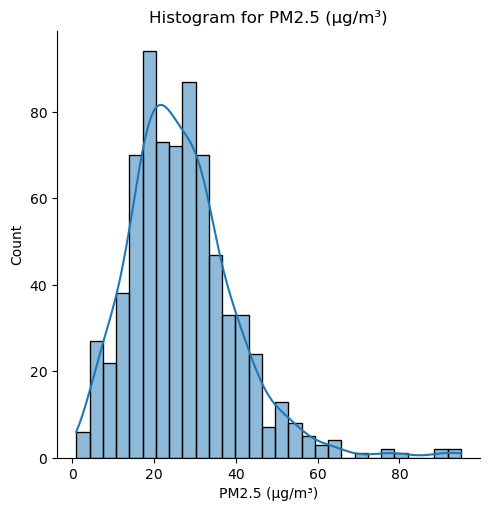

mean of RF (mm) is : 0.022513440860215055


C:\Users\amita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


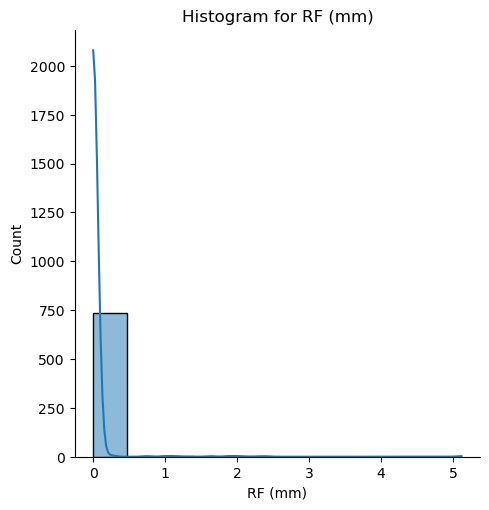

mean of WD (deg) is : 121.1810595645971


C:\Users\amita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


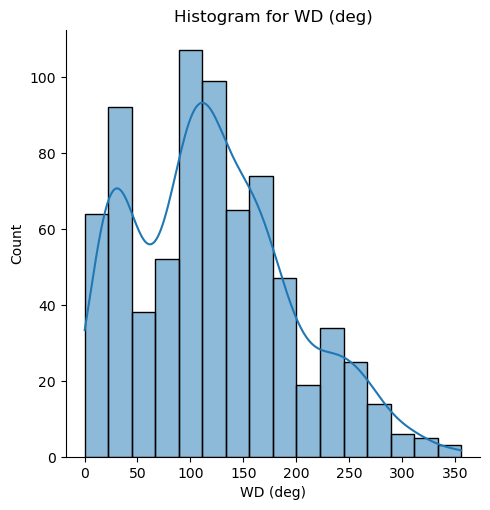

mean of WS (m/s) is : 0.9220564516129032


C:\Users\amita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


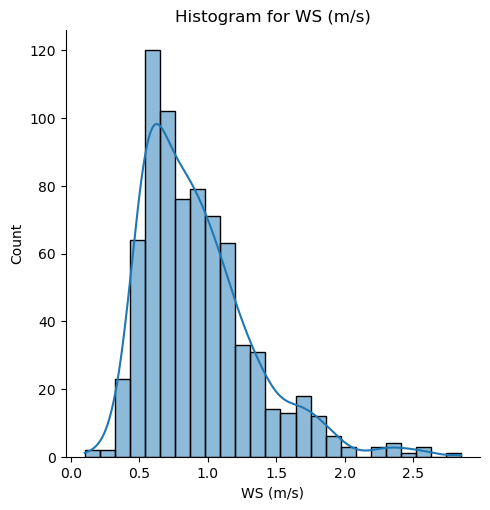

mean of RH (%) is : 76.2104569892473


C:\Users\amita\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


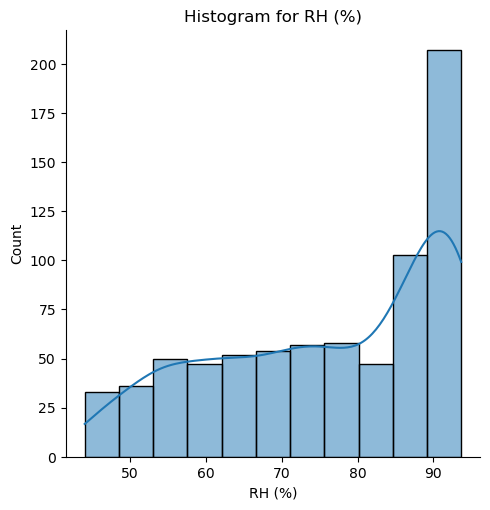

In [83]:
# histogram for PM2.5
cols = ['PM2.5 (µg/m³)','RF (mm)','WD (deg)','WS (m/s)','RH (%)']
for i in cols:
    print(f"mean of {i} is : {np.mean(df1[i])}")
    sns.displot(df1[i], kde = True)
    tit = 'Histogram for '+ i
    plt.title(tit)
    plt.show()


**Observation**

- PM2.5 is somewhat normal however statistical test like KS test or QQ plot can be used to check normality. 
- There hasn’t been much rainfall occured in July 2023 with mean of only 0.022 mm. 
- Most of the time wind (mean 121.18 degrees) has blow in II quadrant i.e. in NW (North - West) quadrant. 
- The mean Relative humidity in this month is 76.21%. 
- The mean wind speed is 0.92 m/sec.

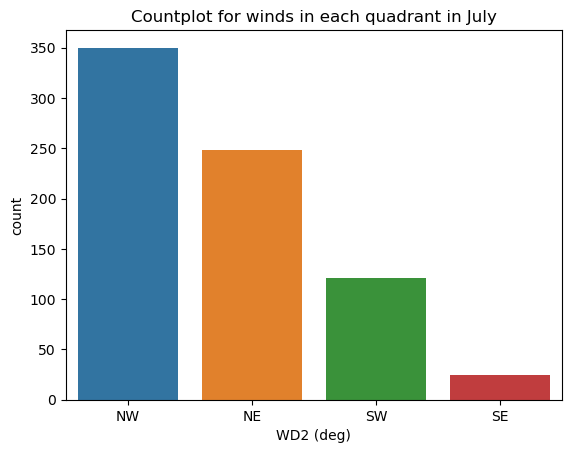

In [85]:
sns.countplot(data = df1, x = 'WD2 (deg)' )
plt.title('Countplot for winds in each quadrant in July')
plt.show()

**Observation** 
- This shows that the wind has blow in NW (North-West) quadrant the most followed by NE (North-East) quadrant. 
- Least amount of winds are blowing in IV quadrant of SE (South-East).

### Bivariate Analysis

#### 1.  At what time of the day PM2.5 is max?

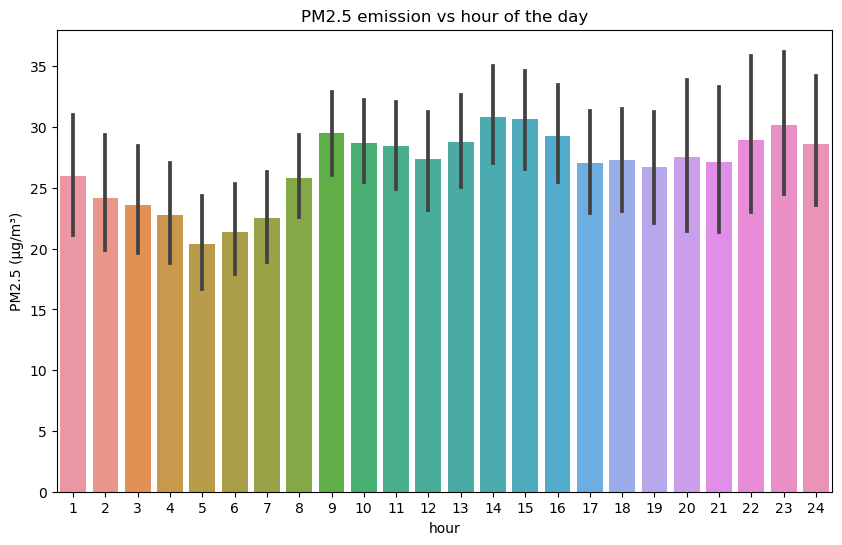

In [87]:
plt.figure(figsize = (10,6))
sns.barplot(data = df1, x = 'hour',y = 'PM2.5 (µg/m³)')
plt.title('PM2.5 emission vs hour of the day')
plt.show()

**Observation**
- The PM 2.5 levels starts to rise from the morning and after 9 AM keep on fluctuating by small changes. The early morning rise may be caused by the school buses and after 9:00 AM PM 2.5 rise increase can be due to public transport and personal automobiles as people start their businesses like going office, running shops, opening of shopping malls etc. 
- By the evening, people tend to return from their work, or go for an outing. That is why the traffic in evening is high and hence the PM2.5 levels.

#### 2. How many days did the rainfall occur in the month of July?

Number of days rainfall occured: 6


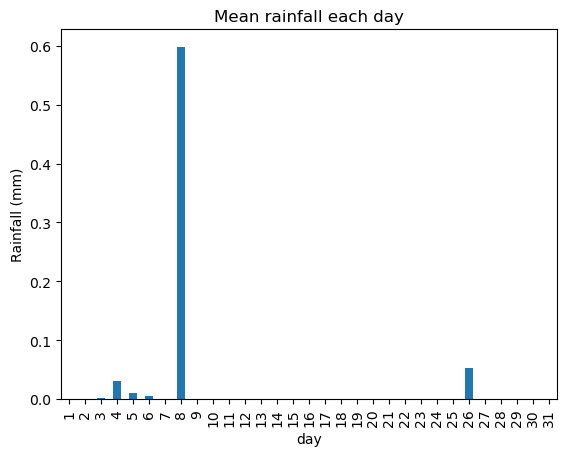

In [89]:
print(f"Number of days rainfall occured: {((((df1[['day','RF (mm)']]).groupby('day'))['RF (mm)'].mean()) != 0).sum()}")
(((df1[['day','RF (mm)']]).groupby('day'))['RF (mm)'].mean()).plot(kind= 'bar', title = 'Mean rainfall each day')
plt.ylabel('Rainfall (mm)')
plt.show()

Only 6 days there was rainfall in the month of July 2023 (3,4,5,6,8, and 26). On 8th July max
rainfall was observed.


#### 3. Which week did the rainfall occur in the month of July?

Rainfall in mm: 
 week
1     0.00
2    15.50
3     0.00
4     1.25
Name: RF (mm), dtype: float64


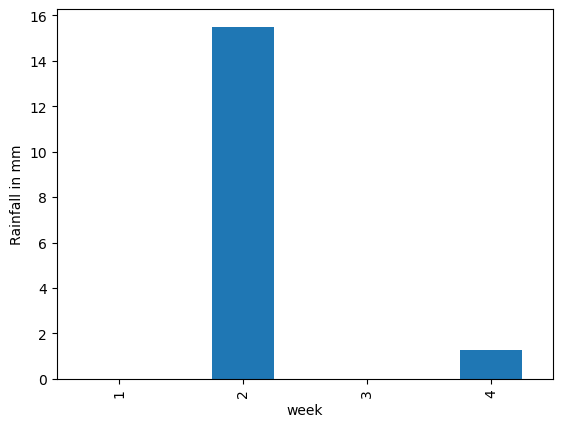

In [92]:
print("Rainfall in mm: \n",((df1[['RF (mm)','week']]).groupby('week')['RF (mm)'].sum()))
# visualization
((df1[['RF (mm)','week']]).groupby('week')['RF (mm)'].sum()).plot(kind = 'bar')
plt.ylabel('Rainfall in mm')
plt.show()

There was rainfall in the week 2 and last week, with max rainfall occuring in week
2

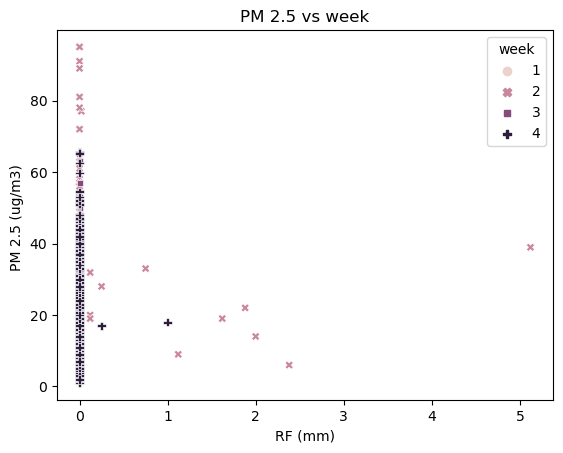

In [94]:
sns.scatterplot(data = df1, x = 'RF (mm)', y = 'PM2.5 (µg/m³)', hue = 'week', style = 'week')
plt.ylabel('PM 2.5 (ug/m3) ')
plt.title('PM 2.5 vs week')
plt.show()


**Observation** 
- No significant drop was observed in the PM2.5 even when rainfall occured. 
- Since, most of the days were without rainfall most of the values are concentrated in a single vertical line.
- In week 2, PM2.5 levels reach their maximum values.


#### 4. What is the 24 hour mean of PM2.5 ?

24 hour mean of PM 2.5
 26.8219105228537


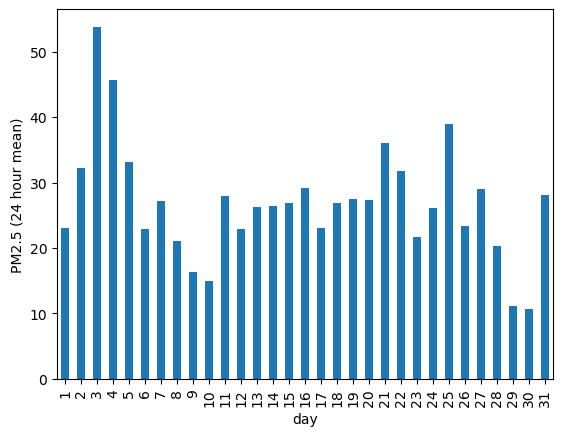

In [96]:
print("24 hour mean of PM 2.5\n",((df1[['day','PM2.5 (µg/m³)']]).groupby('day')['PM2.5 (µg/m³)'].mean()).values.mean())
# visualization
((df1[['day','PM2.5 (µg/m³)']]).groupby('day')['PM2.5 (µg/m³)'].mean()).plot(kind = 'bar')
plt.ylabel('PM2.5 (24 hour mean)')
plt.show()

As per ambient air quality standards are based on the authority of the Environment Act (1986), for
residential/industrial/rural and other area (other than ecologically sensitive areas), PM2.5 levels
should not be greated than 60 ug/m3. And values in not observed greater than 60 ug/m3, which
is a good sign.


In [98]:
# reading of wind as per quadrant each hour
df1['WD2 (deg)'].value_counts(normalize = True)*100

WD2 (deg)
NW    47.043011
NE    33.333333
SW    16.263441
SE     3.360215
Name: proportion, dtype: float64

**Observation** 
- There 46.37% of total hours in the month of July wind has blown in the quandrantof NW (North-West) followed by NE (North-East) with 33.87% of total hours.


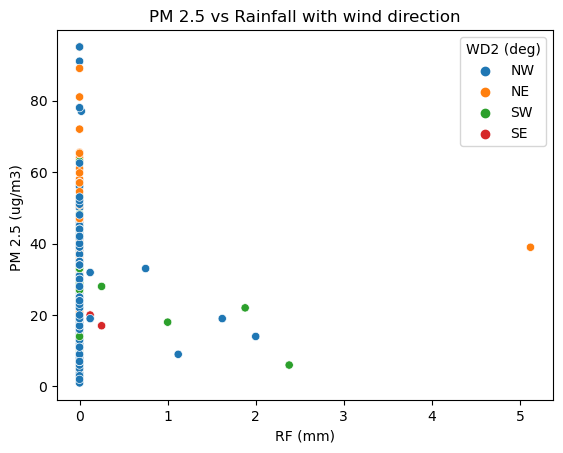

In [105]:
sns.scatterplot(data = df1, x = df1['RF (mm)'], y = df1['PM2.5 (µg/m³)'], hue = 'WD2 (deg)')
plt.ylabel('PM 2.5 (ug/m3) ')
plt.title("PM 2.5 vs Rainfall with wind direction")
plt.show()

**Observation** 
- Days of rainfall, the wind direction was in SW and NW direction and very little rainfall occured when the wind direction was in IV quadrand SE (South-East).

#### 5. How is the wind speed in each quadrant ?

Mean of wind speed in each quadrant:
WD2 (deg)
NE    0.915040
NW    0.903343
SE    1.006000
SW    0.973223
Name: WS (m/s), dtype: float64


Text(0, 0.5, 'Wind Speed (m/sec) ')

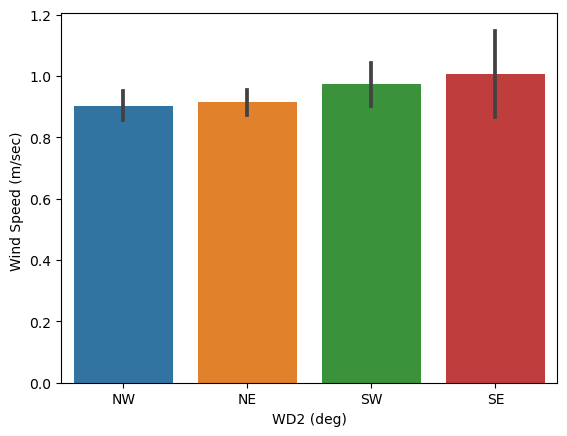

In [106]:
print('Mean of wind speed in each quadrant:')
print((df1[['WD2 (deg)','WS (m/s)']].groupby('WD2 (deg)'))['WS (m/s)'].mean())
sns.barplot(data = df1, x = 'WD2 (deg)',y = 'WS (m/s)')
plt.ylabel('Wind Speed (m/sec) ')

**Observation** 
- Winds are fastest when they are flowing in IV quandrant SE (south-east). 
- winds are slowest when they are in NW (North-West) quadrant.


#### Scatter plot of PM 2.5 with other meterological features

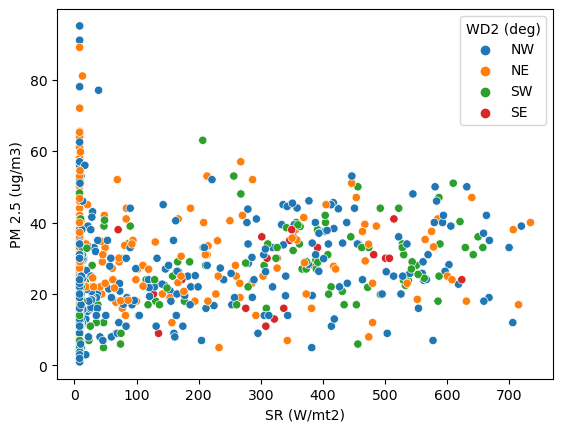

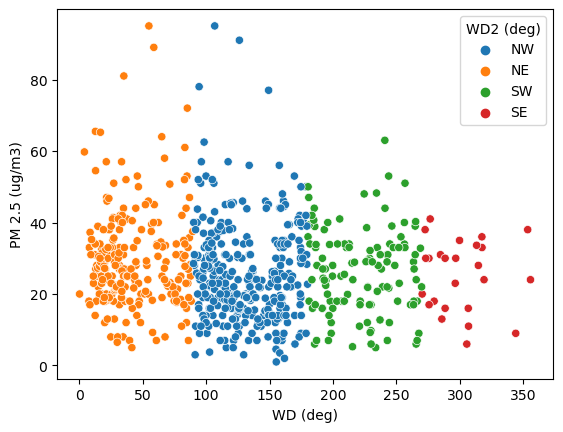

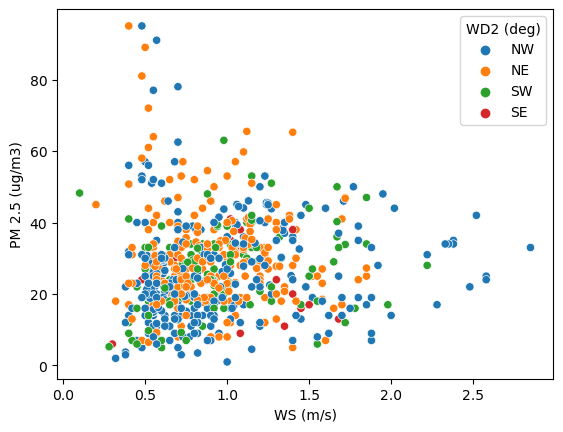

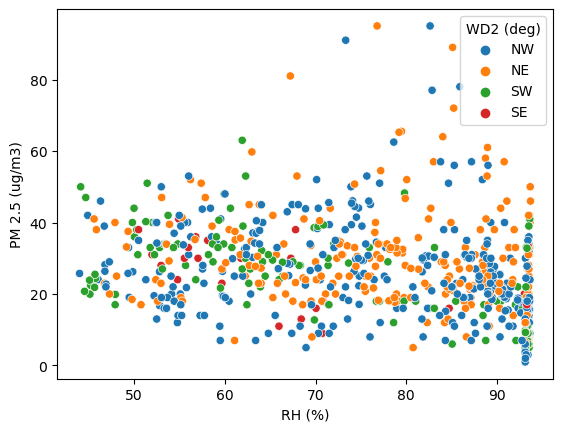

In [111]:
cols = ['SR (W/mt2)', 'WD (deg)', 'WS (m/s)', 'RH (%)']
for i in cols:
    sns.scatterplot(data = df1, x = i, y = 'PM2.5 (µg/m³)', hue = 'WD2 (deg)')
    plt.xlabel(i)
    plt.ylabel('PM 2.5 (ug/m3)')
    plt.show()

**Observation** 
- Hours when wind speed is low, the spectrum of possible values of PM2.5 is greater as compare to the other hours when the wind speed was large. 
- As wind speed decreases, PM 2.5 levels increases (i.e. inverse relationship) 
- Change in the RH is not causing a significant change in the PM2.5 values.

THe mean PM2.5 on each week day:
weekday
0    29.187168
1    34.850186
2    26.718485
3    26.403851
4    27.471340
5    22.772962
6    21.980626
Name: PM2.5 (µg/m³), dtype: float64


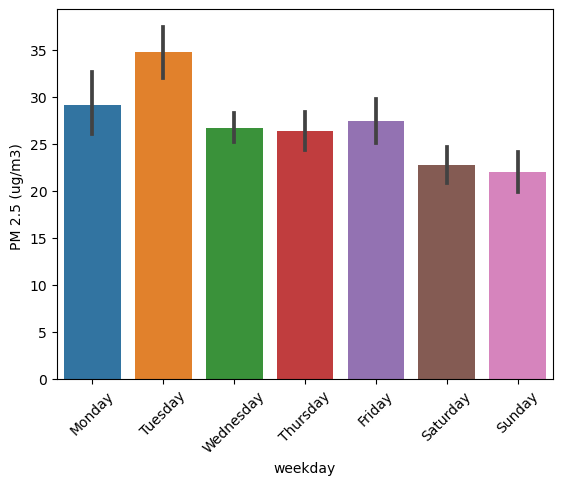

In [112]:
print('THe mean PM2.5 on each week day:')
print((df1[['PM2.5 (µg/m³)','weekday']]).groupby('weekday')['PM2.5 (µg/m³)'].mean())
sns.barplot(data = df1, x = 'weekday',y = 'PM2.5 (µg/m³)').set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday',"Sunday"],rotation = 45)
plt.ylabel('PM 2.5 (ug/m3) ')
plt.title('')
plt.show()


**Observation** - The max average PM2.5 is observed on Tuesdays and least on Sundays.


In [113]:
# statistical values
df1.describe()


,PM2.5 (µg/m³),RF (mm),SR (W/mt2),WD (deg),WS (m/s),RH (%),AT (°C),TOT-RF (mm),hour,day,weekday,week
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,26.821911,0.022513,162.258562,121.181060,0.922056,76.210457,32.009621,0.022513,12.500000,16.000000,3.064516,3.129032
std,13.150529,0.245130,201.187157,74.441873,0.404609,15.074971,2.842049,0.245238,6.926843,8.950289,2.079478,0.975896
min,1.000000,0.000000,8.400000,0.200000,0.100000,44.000000,27.800000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,18.000000,0.000000,8.520000,61.225545,0.610000,63.445000,29.675567,0.000000,6.750000,8.000000,1.000000,2.000000
50%,25.000000,0.000000,37.400000,115.091089,0.820000,78.955000,31.125000,0.000000,12.500000,16.000000,3.000000,3.000000
75%,33.082423,0.000000,308.310000,164.134904,1.120000,90.220000,34.031250,0.000000,18.250000,24.000000,5.000000,4.000000
max,95.000000,5.120000,733.900000,355.700000,2.850000,93.680000,39.825000,5.125000,24.000000,31.000000,6.000000,4.000000


**Observation** 
- The median PM2.5 level, Rainfall, wind speed and Relative humidity is 25 ug/m3,0 mm, 0.84 m/sec, and 79.01% respectively

#### Correlation

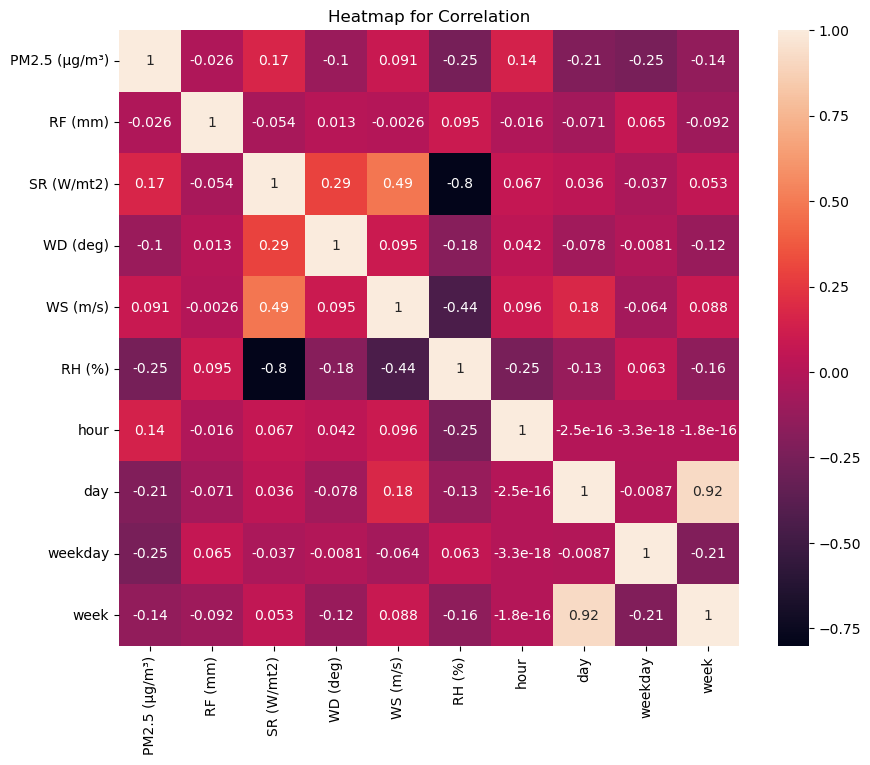

In [114]:
plt.figure(figsize = (10,8))
sns.heatmap(df1[['PM2.5 (µg/m³)', 'RF (mm)', 'SR (W/mt2)', 'WD (deg)', 'WS (m/s)', 'RH (%)', 'hour', 'day','weekday', 'week']].corr(),annot = True)
plt.title('Heatmap for Correlation')
plt.show()

**Observation** 
- Only relative humidity (RH) and solar radiation (SR) are showing a strong negative correlation. 
- Solar radiation and Wind speed are showing a significant positive correlation between them. 
- Wind speed and Relative humidity follows negative corrrelation in between.
- Wind direction and solar radiation have weak positve correlation between them. This relationship was also observed in the scatter plots above.